<div>
<center><img src="images/pan_am.jpeg" width=600 height=500></center>
</div>

## <center> **Author** Jesse Moore </center>

## Overview

WThis project explores our client's expansion into the airline industry, focusing on assessing the safety of available commercial airplanes. Using data from the National Transportation Safety Board (NTSB), we aim to identify airplanes with the highest and lowest safety risks.


## Business Problem

Our objective is to determine airplanes with the lowest risk factors regarding injuries and fatalities to passengers, addressing critical concerns for our client's investment in a safe airline operation. We will analyze factors such as weather conditions, engine types, and other variables that may influence safety outcomes.


## Data Understanding

The dataset spans from 1962 to 2023 and includes civilian aviation accidents and incidents within the USA and international waters. Key variables include aircraft make and model, fatalities, injuries, weather conditions, engine configurations, and whether the aircraft was amateur-built. Our analysis will prioritize aircraft models with the lowest fatalities and injuries.

<div>
<center><img src="images/plane_lands.jpeg" width=600 height=500></center>
</div>

In [1]:
# Import standard packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

%matplotlib inline

In [2]:
#Loading our dataset
df = pd.read_csv('zippedData/AviationData.csv', encoding='latin1', low_memory=False)

In [3]:
#Initial exploration of data 
df.shape

(88889, 31)

In [4]:
#Investigating our column names, missing values, and datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
#Initial exploration of data 
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
#investigating the statistical values of our dataset.
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# Data Preparation

## Data Cleaning

Before we do anything further we will improve readability by normalizing the column names by removing the '.' in each
multi-word name and replacing it with an underscore and making all the names lowercase. 

In [7]:
#Improving the usability of the column names
df.columns = df.columns.str.lower().str.replace('.', '_')

In [8]:
#Creating a list of the columns we want.
relevant_columns = ['make', 'model', 'total_fatal_injuries', 'total_serious_injuries',  'total_minor_injuries', 
                    'total_uninjured', 'weather_condition', 'injury_severity', 'aircraft_damage','amateur_built',
                    'number_of_engines', 'engine_type', 'event_date']

#Creating our filtered dataframe.
filtered_df = df[relevant_columns].copy()
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   make                    88826 non-null  object 
 1   model                   88797 non-null  object 
 2   total_fatal_injuries    77488 non-null  float64
 3   total_serious_injuries  76379 non-null  float64
 4   total_minor_injuries    76956 non-null  float64
 5   total_uninjured         82977 non-null  float64
 6   weather_condition       84397 non-null  object 
 7   injury_severity         87889 non-null  object 
 8   aircraft_damage         85695 non-null  object 
 9   amateur_built           88787 non-null  object 
 10  number_of_engines       82805 non-null  float64
 11  engine_type             81793 non-null  object 
 12  event_date              88889 non-null  object 
dtypes: float64(5), object(8)
memory usage: 8.8+ MB


In [9]:
#Converting our 'event_date' to pd.to_datetime
filtered_df['event_date'] = pd.to_datetime(filtered_df['event_date'])
filtered_df['event_date'].head()

0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
4   1979-08-02
Name: event_date, dtype: datetime64[ns]

In [10]:
#Dropping any missing values.
filtered_df.dropna(inplace=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64805 entries, 0 to 88767
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   make                    64805 non-null  object        
 1   model                   64805 non-null  object        
 2   total_fatal_injuries    64805 non-null  float64       
 3   total_serious_injuries  64805 non-null  float64       
 4   total_minor_injuries    64805 non-null  float64       
 5   total_uninjured         64805 non-null  float64       
 6   weather_condition       64805 non-null  object        
 7   injury_severity         64805 non-null  object        
 8   aircraft_damage         64805 non-null  object        
 9   amateur_built           64805 non-null  object        
 10  number_of_engines       64805 non-null  float64       
 11  engine_type             64805 non-null  object        
 12  event_date              64805 non-null  datetime64[

In [11]:
#Investigating our 'engine_type' column values.
filtered_df['engine_type'].value_counts()

engine_type
Reciprocating      57602
Turbo Shaft         2715
Turbo Prop          2365
Turbo Fan           1064
Unknown              637
Turbo Jet            409
Electric               7
NONE                   2
Hybrid Rocket          1
Geared Turbofan        1
LR                     1
UNK                    1
Name: count, dtype: int64

In [12]:
#Investigating our 'weather_condition' column values.
filtered_df['weather_condition'].value_counts()

weather_condition
VMC    59531
IMC     4572
UNK      593
Unk      109
Name: count, dtype: int64

To handle rows with unknown values in 'engine_type' and 'weather_condition', we define a function unknown_filter to filter these rows out.

In [14]:
#defining our function
def unknown_filter(df_to_filter):
    
    #creating our columns to filter.
    object_cols = df_to_filter.select_dtypes(include=object).columns
    
    #creating and returning our new filtered dataframe.
    new_filtered_df = df_to_filter[~df_to_filter[object_cols].apply(lambda x: x.str.match(r'Unk|UNK|NONE')).any(axis=1)]
    
    return new_filtered_df

In [15]:
#Using our new function
filtered_df2 = unknown_filter(filtered_df)

In [16]:
#Ensuring that it has worked on 'weather_condition'
filtered_df2['weather_condition'].value_counts()

weather_condition
VMC    58900
IMC     4560
Name: count, dtype: int64

In [17]:
#Ensuring out Number of Engines is 1.0 or greater.
filtered_df2 = filtered_df2[filtered_df2['number_of_engines'] >= 1.0]
filtered_df2['number_of_engines'].value_counts()

number_of_engines
1.0    55567
2.0     7417
3.0      255
4.0      217
8.0        2
Name: count, dtype: int64

In [18]:
#Ensuring that it has worked on 'engine_type'
filtered_df2['engine_type'].value_counts()

engine_type
Reciprocating      57015
Turbo Shaft         2674
Turbo Prop          2332
Turbo Fan           1025
Turbo Jet            402
Electric               7
Hybrid Rocket          1
Geared Turbofan        1
LR                     1
Name: count, dtype: int64

In [19]:
#let's create a variable to store our mean of 'total_fatal_injuries' for use in our plotting.
overall_mean = filtered_df2['total_fatal_injuries'].mean()

In [20]:
#To further clean our dataframe let's change 'Airbus Industrie' to 'Airbus'.
filtered_df2['make'] = filtered_df2['make'].replace('AIRBUS INDUSTRIE', 'AIRBUS')

In [21]:
filtered_df2.to_csv('./zippedData/cleaned_airline_safety_df.csv')

## Analysis

## Weather Condition

Now we look will look at the weather condition values to see what factor weather plays in our data.

In [22]:
filtered_df2['weather_condition'].value_counts()

weather_condition
VMC    58898
IMC     4560
Name: count, dtype: int64

 These 'weather_condition' codes are not known to us, but research clarifies these are:
 VMC = visual meteorological conditions (or, sight is unimpaired)
 IMC = instrument meteorological conditions (or, sight is impaired due to weather)

In [23]:
#Now let's find out the 'total_fatal_injuries' mean by month and group them by weather condition.

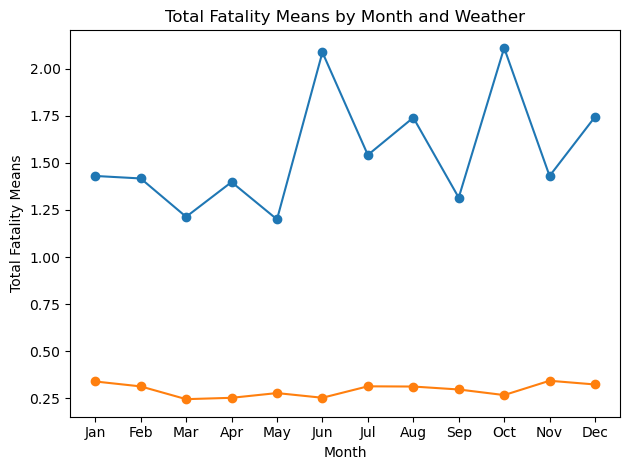

In [24]:
#We can create a plot to visualize if the time of year effects 

#creating our month feature for plotting.
filtered_df2.loc[:, 'month'] = filtered_df2['event_date'].dt.month

#grouping our dataframe by 'month' and 'weather_condition' and finding out means for 'total_fatal_injuries'
grouped_df = filtered_df2.groupby(['month', 'weather_condition'])['total_fatal_injuries'].mean().unstack()

#creating our plots.
for col in grouped_df.columns:
    plt.plot(grouped_df.index, grouped_df[col], marker='o', label=col)

#a list of months tso call. 
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#finishing our plots.

plt.xticks(ticks=grouped_df.index, labels=[months[i-1] for i in grouped_df.index])
plt.xlabel('Month')
plt.ylabel('Total Fatality Means')
plt.savefig("./images/Total Fatality Means by Month and Weather.png", dpi=150)
plt.title('Total Fatality Means by Month and Weather')
plt.tight_layout()
plt.savefig("./images/Total Fatality Means by Month and Weather.png", dpi=150);

## Number of Engines and Engine Type

In [25]:
#Creating a list of columns and a new dataframe grouping by engine_number and engine_type with the columns
#from plot_columns.

plot_columns =['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']

engine_means = filtered_df2.groupby(['number_of_engines', 'engine_type'])[plot_columns].mean()

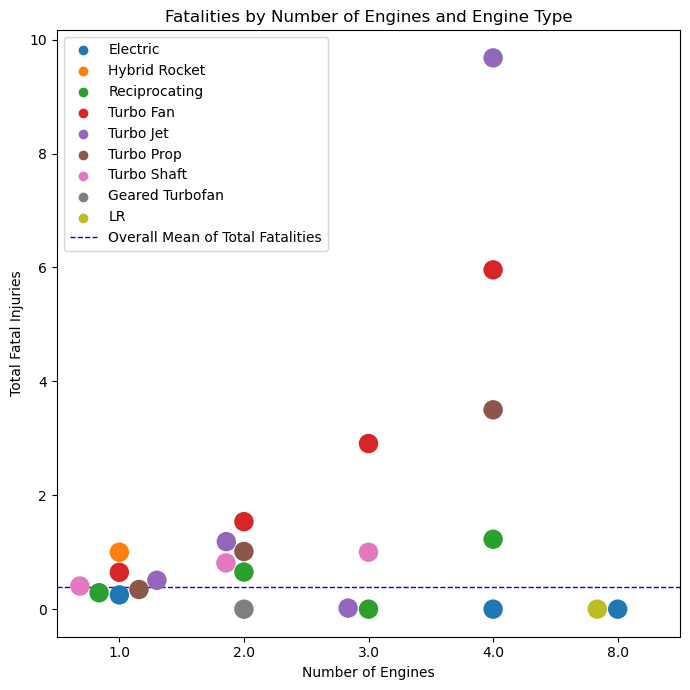

In [26]:
#Creating our plot

#filtering a warning. 
warnings.filterwarnings('ignore', category=FutureWarning, message=',*use_inf_as_na*')

#creating out plots.
plt.figure(figsize=(7,7))
sns.swarmplot(x='number_of_engines', y='total_fatal_injuries', hue='engine_type', data=engine_means, s=14)
plt.title('Fatalities by Number of Engines and Engine Type')
plt.xlabel('Number of Engines') 
plt.ylabel('Total Fatal Injuries')
plt.tight_layout()
plt.axhline(overall_mean, color='blue', linestyle='--', linewidth=1, label='Overall Mean of Total Fatalities')
plt.tight_layout()
plt.legend()
plt.savefig("./images/Fatalities by Number of Engines and Engine Type.png", dpi=150);

In [27]:
#creating our new DataFrame grouped by Make and Model
grouped_df = filtered_df2.groupby(['make', 'model'])[plot_columns].mean()

Now let's add a column called 'z-score' that shows us the z-score of each make and model.


In [28]:
#creating a function to speed up the process. 
def z_score_creator(our_df, total_group):

    #creating our z-scores variable
    z_scores =(our_df[total_group] - our_df[total_group].mean()) / our_df[total_group].std()

    #creating the proper indexing for our z-scores.
    col_index = our_df.columns.get_loc(total_group) + 1
    
    #inserting our new feature 
    our_df.insert(col_index, total_group + '_z-score', z_scores)

In [29]:
#Using our plot columns list to create our new columns.

for col in plot_columns:
    z_score_creator(grouped_df, col)

In [30]:
#now we want to create a new feature named 'safety'


def safety_cat(final_df):
    '''
    This function the std deviations of a plane's 'total_fatal_injuries', 'total_serious_injuries',
    'total_minor_injuries', and 'total_uninjured' and returns a string to categorize planes for their relative
    safety. The criteria for a 'safe' plane will be:
    Negative standard deviations for 'total_fatal_injuries', 'total_serious_injuries', and 'total_minor_injuries',
    and positive standard deviations for 'total_uninjured'. 
    
    
    If total_fatal_injuries', 'total_serious_injuries', and 'total_minor_injuries' std == negative, safety = 'safe'

    If total_fatal_injuries', 'total_serious_injuries', std == negative, AND
    'total_minor_injuries' std == positive, safety = 'less safe'

    If total_fatal_injuries' std == negative, AND
    'total_serious_injuries', std == positive, safety = 'not safe'

    If total_fatal_injuries' std == positive, safety = 'dangerous'

    
    '''
 #creating out list of conditions
    conditions = [
        (final_df['total_fatal_injuries_z-score'] < 0 
        and final_df['total_serious_injuries_z-score'] < 0 
        and final_df['total_minor_injuries_z-score'] < 0 
        and final_df['total_uninjured_z-score'] > 0, 'Safe'),
            
        (final_df['total_fatal_injuries_z-score'] < 0 
        and final_df['total_serious_injuries_z-score'] < 0
        and final_df['total_minor_injuries_z-score'] > 0, 'Less Safe'),
        
        (final_df['total_fatal_injuries_z-score'] > 0 and final_df['total_serious_injuries_z-score'] < 0, 'Not Safe')
        ]

    #iterating through our dataframe. 
    for condition, outcome in conditions:
        if condition:
            return outcome
            
    #if none of these conditions are met, we return 'Dangerous'.            
    return 'Dangerous'

In [31]:
grouped_df['safety'] = grouped_df.apply(safety_cat, axis=1)


In [32]:
#We still need to rename the columns that we used from 'plot_columns' to reflect that they represent the means.
grouped_df = grouped_df.rename(columns={col: f'{col}_mean' for col in plot_columns})

In [33]:
#ensuring our new columnes are inserted properly.
grouped_df.head()

,,total_fatal_injuries_mean,total_fatal_injuries_z-score,total_serious_injuries_mean,total_serious_injuries_z-score,total_minor_injuries_mean,total_minor_injuries_z-score,total_uninjured_mean,total_uninjured_z-score,safety
make,model,,,,,,,,,
177MF LLC,PITTS MODEL 12,0.0,-0.166515,2.0,1.306566,0.0,-0.215108,0.0,-0.171715,Dangerous
1st Ftr Gp,FOCKE-WULF 190,1.0,0.212447,0.0,-0.184429,0.0,-0.215108,0.0,-0.171715,Not Safe
2007 Savage Air LLC,EPIC LT,0.0,-0.166515,0.0,-0.184429,0.0,-0.215108,4.0,-0.003303,Dangerous
2021FX3 LLC,CCX-2000,0.0,-0.166515,0.0,-0.184429,0.0,-0.215108,2.0,-0.087509,Dangerous
67 Flying Dutchman,D1/LFD-13,0.0,-0.166515,0.0,-0.184429,0.0,-0.215108,1.0,-0.129612,Dangerous


Now we will create a function to filter our data into different groups, 
where our goal is to have negative z-scores for all applicable columns except 'total_uninjured' which will be positive.
From this group we will then create a plot to find the safest airplane in our dataset. 

In [34]:
#creating a new dataframe with only our planes deemed 'safe'. 
safe_planes = grouped_df[grouped_df['safety'] == 'Safe']

In [35]:
#Ensuring that this dataframe works.
safe_planes.head()

total_fatal_injuries_mean  \
make                        model                                
AEROSPATIALE                AS355F1                        0.0   
AGUSTAWESTLAND PHILADELPHIA AW139                          0.0   
AIRBUS                      320                            0.0   
                            321                            0.0   
                            A220                           0.0   

                                     total_fatal_injuries_z-score  \
make                        model                                   
AEROSPATIALE                AS355F1                     -0.166515   
AGUSTAWESTLAND PHILADELPHIA AW139                       -0.166515   
AIRBUS                      320                         -0.166515   
                            321                         -0.166515   
                            A220                        -0.166515   

                                     total_serious_injuries_mean  \
make                        model                                  
AEROSPATIALE                AS355F1                          0.0   
AGUSTAWESTLAND PHILADELPHIA AW139                            0.0   
AIRBUS                      320                              0.0   
                            321                              0.0   
                            A220                             0.0   

                                     total_serious_injuries_z-score  \
make                        model                                     
AEROSPATIALE                AS355F1                       -0.184429   
AGUSTAWESTLAND PHILADELPHIA AW139                         -0.184429   
AIRBUS                      320                           -0.184429   
                            321                           -0.184429   
                            A220                          -0.184429   

                                     total_minor_injuries_mean  \
make                        model                                
AEROSPATIALE                AS355F1                        0.0   
AGUSTAWESTLAND PHILADELPHIA AW139                          0.0   
AIRBUS                      320                            0.0   
                            321                            0.0   
                            A220                           0.0   

                                     total_minor_injuries_z-score  \
make                        model                                   
AEROSPATIALE                AS355F1                     -0.215108   
AGUSTAWESTLAND PHILADELPHIA AW139                       -0.215108   
AIRBUS                      320                         -0.215108   
                            321                         -0.215108   
                            A220                        -0.215108   

                                     total_uninjured_mean  \
make                        model                           
AEROSPATIALE                AS355F1                   5.0   
AGUSTAWESTLAND PHILADELPHIA AW139                     9.0   
AIRBUS                      320                     162.0   
                            321                     192.0   
                            A220                    121.0   

                                     total_uninjured_z-score safety  
make                        model                                    
AEROSPATIALE                AS355F1                 0.038800   Safe  
AGUSTAWESTLAND PHILADELPHIA AW139                   0.207212   Safe  
AIRBUS                      320                     6.648969   Safe  
                            321                     7.912058   Safe  
                            A220                    4.922746   Safe

# Now that we have a way to view the safest planes easily let's make a plot to show the top 5 safest planes total_fatal_injuries, total_serious_injuries, total_minor_injuries, and total_uninjured.

In [36]:
#sorting to create our top 5 safest planes. 

top_safe_planes = safe_planes.nlargest(5, 'total_uninjured_mean')

In [37]:
top_safe_planes

total_fatal_injuries_mean  total_fatal_injuries_z-score  \
make   model                                                               
AIRBUS A380                            0.0                     -0.166515   
Boeing 747-130                         0.0                     -0.166515   
       747-243B                        0.0                     -0.166515   
AIRBUS A330-323                        0.0                     -0.166515   
Boeing B-747                           0.0                     -0.166515   

                 total_serious_injuries_mean  total_serious_injuries_z-score  \
make   model                                                                   
AIRBUS A380                              0.0                       -0.184429   
Boeing 747-130                           0.0                       -0.184429   
       747-243B                          0.0                       -0.184429   
AIRBUS A330-323                          0.0                       -0.184429   
Boeing B-747                             0.0                       -0.184429   

                 total_minor_injuries_mean  total_minor_injuries_z-score  \
make   model                                                               
AIRBUS A380                            0.0                     -0.215108   
Boeing 747-130                         0.0                     -0.215108   
       747-243B                        0.0                     -0.215108   
AIRBUS A330-323                        0.0                     -0.215108   
Boeing B-747                           0.0                     -0.215108   

                 total_uninjured_mean  total_uninjured_z-score safety  
make   model                                                           
AIRBUS A380                     576.0                24.079605   Safe  
Boeing 747-130                  471.5                19.679843   Safe  
       747-243B                 459.0                19.153556   Safe  
AIRBUS A330-323                 454.0                18.943041   Safe  
Boeing B-747                    440.0                18.353599   Safe

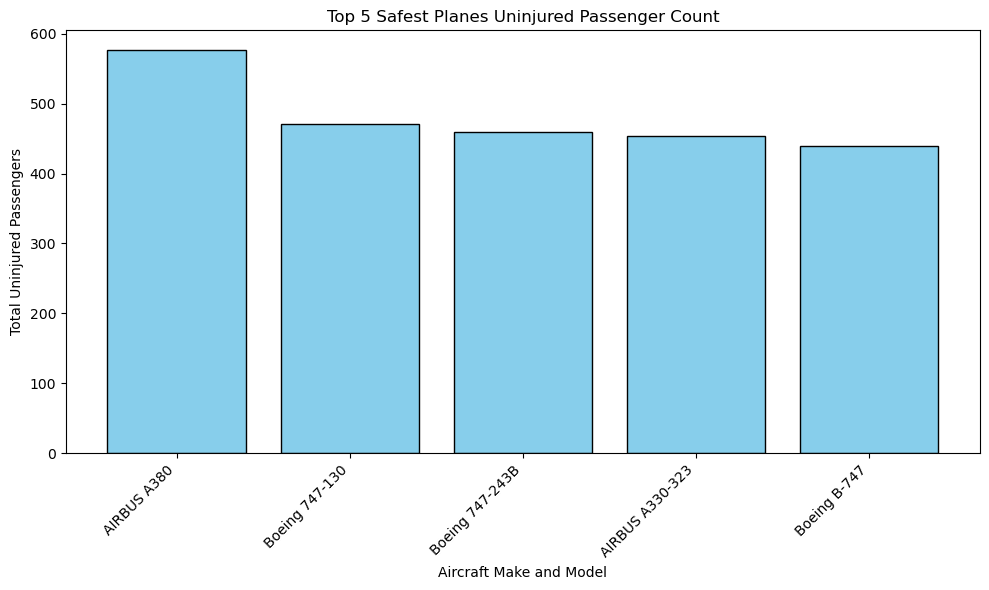

In [38]:
#creating our x-tick labels with 'make' and 'model'
labels = [f'{make} {model}' for make, model in top_safe_planes.index]

#creating out plot.
plt.figure(figsize=(10,6))
plt.bar(labels, top_safe_planes['total_uninjured_mean'],  color='skyblue', linewidth=1, edgecolor='black')
plt.title('Top 5 Safest Planes Uninjured Passenger Count')
plt.xlabel('Aircraft Make and Model') 
plt.ylabel('Total Uninjured Passengers')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("./images/Top 5 Safest Planes Uninjured Passenger Count.png", dpi=300);

In [39]:
top_safe_planes.to_csv('./zippedData/top_safe_planes.csv')

## Evaluation

From these results we interpret that the Airbus A380 to be the safest overall airplane. We can identify a safety risk with regards to the 'Turbo Fan' engine. Furthermore we can see that bad weather conditions account for more total fatalities during the months of June and October. 

We are confident that our analysis is accurate and will provide our client with the ability to make informed decisions with the information
provided. 

## Conclusions

We would recommend that our client purchase the Airbus A380 as that is our safest plane. We would also recommend avoiding planes with a 'Turbo Fan' engine. We would also recommend to pay particular attentionn to the higher number of fatalities during bad weather,
what is called IMC, or instrumental meteorlogical conditions, especially during the months of June and October.

This analysis may not fully solve our business problem since we don't know the scope of our client's
future airline. We also have no information on the capacity for the total number of passengers for each airplane,
or how the total number of flights each particular type of airplane make and model have flown, an airplane that is
more commonly used with a high number of passengers may appear more unsafe, statistically, than one with a small 
number of passengers that is flown rarely. 

In the future we could improve this project by researching the frequency that each plane is used and contrast that to the number
of accidents it is involved with. Additionally, we could map where the most number of accidents occur and also dig into the values
represented in 'Report.Status', to determine if human error is a factor in any accidents. 